In [1]:
import pandas as pd

'''
Info: https://hastie.su.domains/ElemStatLearn/

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal.

sbp		systolic blood pressure
tobacco		cumulative tobacco (kg)
ldl		low densiity lipoprotein cholesterol
adiposity
famhist		family history of heart disease (Present, Absent)
typea		type-A behavior
obesity
alcohol		current alcohol consumption
age		age at onset
chd		response, coronary heart disease
'''

url = "https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data"

# Load the SAheart dataset
df = pd.read_csv(url, index_col='row.names')

# Convert binary text data to numbered categories
df['famhist'] = pd.Categorical(df['famhist']).codes

# Extract the name of the attributes (columns)
attributeNames = list(map(lambda x: x.capitalize(), df.columns.tolist()))


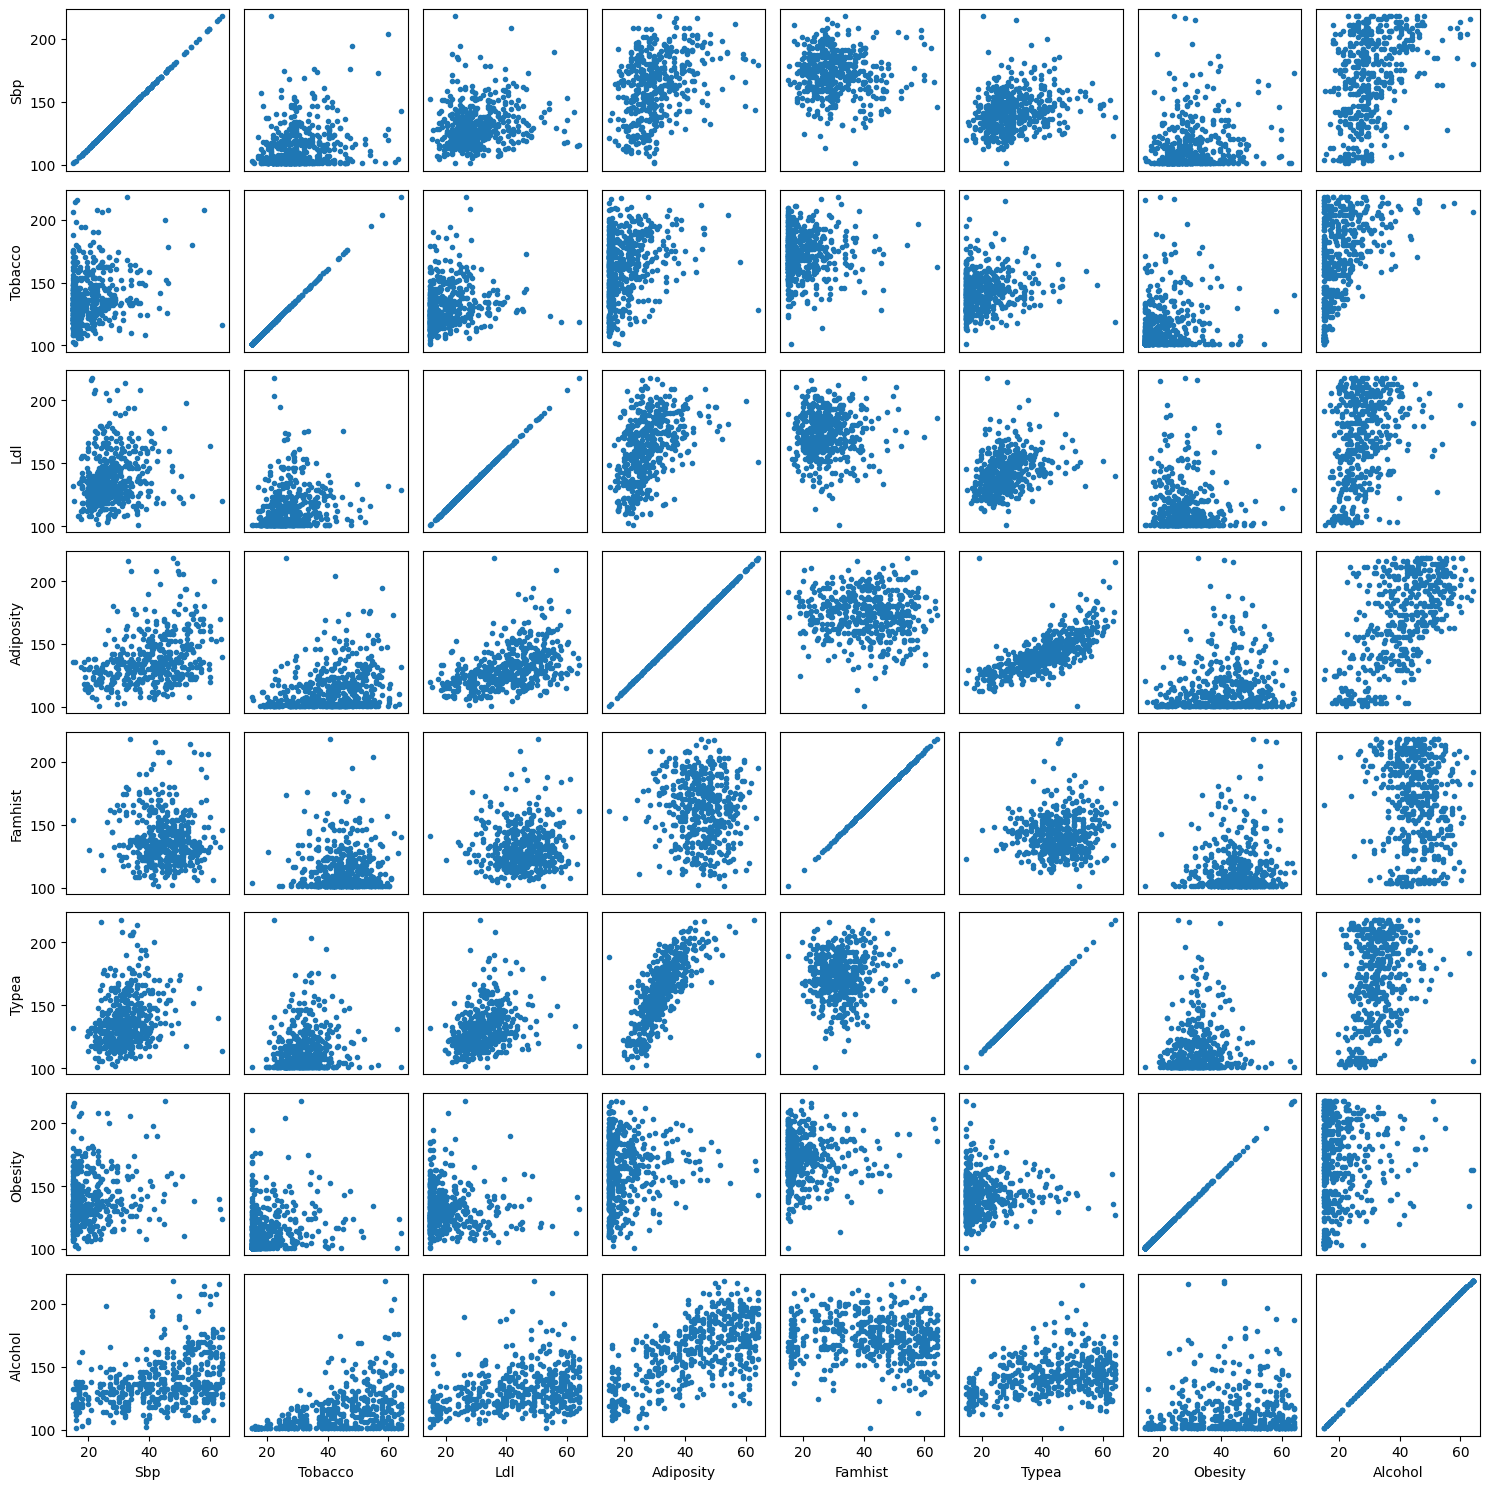

In [3]:
X_plot = df.copy().drop(df.columns[[4, 9]],axis=1).to_numpy()

import matplotlib.pyplot as plt

#Drop columns that contains only boolean values
X_plot = df.copy().drop(df.columns[[4, 9]],axis=1).to_numpy()

plot_range = X_plot.shape[1]

plt.figure(figsize=(15, 15))
for m1 in range(plot_range):
    for m2 in range(plot_range):
        plt.subplot(plot_range, plot_range, m1 * plot_range + m2 + 1)
        plt.plot(X_plot[:, m1], X_plot[:, m2], ".")
        if m1 == plot_range - 1:
            plt.xlabel(attributeNames[m2])
        else:
            plt.xticks([])
        if m2 == 0:
            plt.ylabel(attributeNames[m1])
        else:
            plt.yticks([])
plt.tight_layout()
plt.show()